Implementing a single-layer neural network
@https://github.com/PanugantiSasank123/Single-layer-neural-network

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
df=pd.read_csv('/content/diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
from sklearn.datasets import make_circles


In [8]:
X=df[['BloodPressure']],
y=df['Outcome']

In [9]:
X,y = make_circles(n_samples=35,factor=.2,noise=.04,random_state=42)
outer = y == 0
inner = y == 1

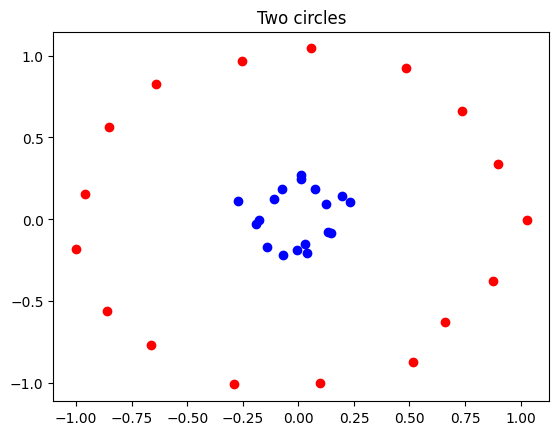

In [10]:
plt.title("Two circles")
plt.plot(X[outer,0],X[outer,1],"ro")
plt.plot(X[inner,0],X[inner,1],"bo")

In [11]:
X=X+1

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [14]:
n_hidden = 10
n_epochs = 200
learning_rate = 0.78

In [15]:
weights_hidden = np.random.normal(0.0,size=(X_train.shape[1], n_hidden))
weights_output = np.random.normal(0.0,size=(n_hidden))

In [16]:
hist_loss=[]
hist_accuracy=[]
print(weights_hidden)
print(weights_output)

[[-0.9984303   1.67156425  1.23895164 -0.79157671  0.29842425  0.28902027
   0.20823068 -0.74568297  1.94946261  0.1687677 ]
 [ 0.53983507  0.42290755  0.34581877  0.6269021   0.82482686  0.71337838
   1.17219053  0.79460125  1.3966877   1.15092682]]
[-0.07615759  0.02220227  2.42773441  0.2383824  -1.15029159 -0.46576421
 -0.94846491  1.29808017 -0.78598669 -0.88195978]


In [21]:
for e in range (n_epochs):
  del_w_hidden = np.zeros(weights_hidden.shape)
  del_w_output = np.zeros(weights_output.shape)
  for x_, y_ in zip(X_train, y_train):
    hidden_input=np.dot(x_, weights_hidden)
    hidden_output=sigmoid(hidden_input)
    output=sigmoid(np.dot(hidden_output, weights_output))

    error = y_ - output
    output_error=error*output*(1-output)
    hidden_error=np.dot(output_error, weights_output)*hidden_output*(1-hidden_output)
    del_w_output += output_error*hidden_output
    del_w_hidden += hidden_error*x_[:, None]



  weights_hidden += learning_rate*del_w_hidden / X_train.shape[0]
  weights_output += learning_rate*del_w_output / X_train.shape[0]



  if e% 1000:
    hidden_output=sigmoid(np.dot(X_val, weights_hidden))
    out=sigmoid(np.dot(hidden_output, weights_output))
    loss=np.mean((out-y_val) **2)
    predictions=out > 0.5
    accuracy=np.mean(predictions == y_val)
    print("Epoch: ", '{:>4}'.format(e),
          "; Validation loss: ", '{:>6}'.format(loss.round(4)),
          "; Validation accuracy: ", '{:>6}'.format(accuracy.round(4)))


Epoch:     1 ; Validation loss:  0.2633 ; Validation accuracy:  0.3333
Epoch:     2 ; Validation loss:  0.2692 ; Validation accuracy:  0.3333
Epoch:     3 ; Validation loss:  0.2737 ; Validation accuracy:  0.3333
Epoch:     4 ; Validation loss:  0.2771 ; Validation accuracy:  0.3333
Epoch:     5 ; Validation loss:  0.2797 ; Validation accuracy:  0.3333
Epoch:     6 ; Validation loss:  0.2816 ; Validation accuracy:  0.3333
Epoch:     7 ; Validation loss:  0.2831 ; Validation accuracy:  0.3333
Epoch:     8 ; Validation loss:  0.2843 ; Validation accuracy:  0.3333
Epoch:     9 ; Validation loss:  0.2852 ; Validation accuracy:  0.3333
Epoch:    10 ; Validation loss:  0.2858 ; Validation accuracy:  0.3333
Epoch:    11 ; Validation loss:  0.2864 ; Validation accuracy:  0.3333
Epoch:    12 ; Validation loss:  0.2868 ; Validation accuracy:  0.3333
Epoch:    13 ; Validation loss:  0.2872 ; Validation accuracy:  0.3333
Epoch:    14 ; Validation loss:  0.2874 ; Validation accuracy:  0.3333
Epoch: